In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from yellowbrick.cluster import SilhouetteVisualizer

## Create dummy data (3 dimensions)

In [3]:
data = make_blobs(
    n_samples=200 , 
    n_features=3, 
    centers=4, 
    cluster_std=0.2, 
    center_box=(-1, 1), 
    random_state=420
)
data

(array([[ 0.11960797, -0.63330163,  0.32647078],
        [-0.78990112,  1.24991092,  0.02371264],
        [-0.71634874, -0.19690367, -0.39202675],
        [-0.51880137,  0.73197515,  0.2885474 ],
        [-0.69826919,  1.07088338,  0.23985651],
        [ 0.32845056, -0.82515636, -1.06063732],
        [-0.18217345, -0.81371843,  0.4665824 ],
        [-0.20362206, -0.78533858,  0.12047873],
        [ 0.33281401, -0.94286627, -0.69046982],
        [-0.35283897,  0.92870219,  0.08314962],
        [ 0.28858976, -0.9773222 , -0.29327931],
        [-0.1325746 , -0.39440339, -0.42644067],
        [-0.40999757, -1.06858459,  0.39734826],
        [-0.31192048, -0.86962666,  0.12750813],
        [-0.6268843 , -0.15885604, -0.58808318],
        [-0.60417318,  0.13150539, -0.36683706],
        [-0.52082474,  0.60441167,  0.32100343],
        [ 0.43589364, -0.73662867, -0.49233922],
        [-0.63898938,  1.04123236,  0.44056661],
        [ 0.54643534, -0.66655713, -0.82802711],
        [-0.7461677 

In [4]:
df = pd.DataFrame(data[0], columns=["feature1", "feature2", "feature3"])
df["cluster"] = data[1]

df.head()

,feature1,feature2,feature3,cluster
0,0.119608,-0.633302,0.326471,2
1,-0.789901,1.249911,0.023713,1
2,-0.716349,-0.196904,-0.392027,0
3,-0.518801,0.731975,0.288547,1
4,-0.698269,1.070883,0.239857,1


## Dimensional Visualizations

Inspect your data and consider outlier removal and standardization/normalization.

In [5]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(
    go.Scatter(
        x=df["feature1"], 
        y=df["feature2"], 
        mode="markers"
    ),
    row=1, col=1,
)

fig.update_xaxes(title_text="feature1", row=1, col=1)
fig.update_yaxes(title_text="feature2", row=1, col=1)

fig.add_trace(
    go.Scatter(
        x=df["feature1"], 
        y=df["feature3"], 
        mode="markers"
    ),
    row=1, col=2
)

fig.update_xaxes(title_text="feature1", row=1, col=2)
fig.update_yaxes(title_text="feature3", row=1, col=2)

fig.add_trace(
    go.Scatter(
        x=df["feature2"], 
        y=df["feature3"], 
        mode="markers"
    ),
    row=1, col=3
)

fig.update_xaxes(title_text="feature2", row=1, col=3)
fig.update_yaxes(title_text="feature3", row=1, col=3)

In [6]:
px.scatter_3d(df, x="feature1", y="feature2", z="feature3", color="cluster", width=600, height=500)

## Elbow Method

In [7]:
inertia = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=420).fit(df.values)
    inertia.append(kmeans.inertia_)
    
inertia

c:\Users\raclo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] Das System kann die angegebene Datei nicht finden
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\raclo\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\raclo\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\raclo\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\raclo\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(ex

[431.30419210954756,
 145.48569090258826,
 86.66587692184886,
 24.057415638913863,
 22.127413495382953,
 20.507160820289627,
 18.839012671306538,
 17.308526577755693,
 15.61193475181187]

In [8]:
px.line(
    x=range(1,10), 
    y=inertia,
    labels={
        "y": "Inertia", 
        "x": "Cluster #"
    },
    width=500, height=300
)

## Silhouette Analysis

[Silhouette Visualizer](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html) comes from the `yellowbrick` package, which will need to be installed in your Anaconda Environment. 

In [9]:
k_clusters = 4 # increment to compare different cluster #s
kmeans = KMeans(n_clusters=k_clusters, random_state=420) 
silhouette_avg = silhouette_score(df, kmeans.fit_predict(df.values))
silhouette_avg

c:\Users\raclo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



0.7164395449825801

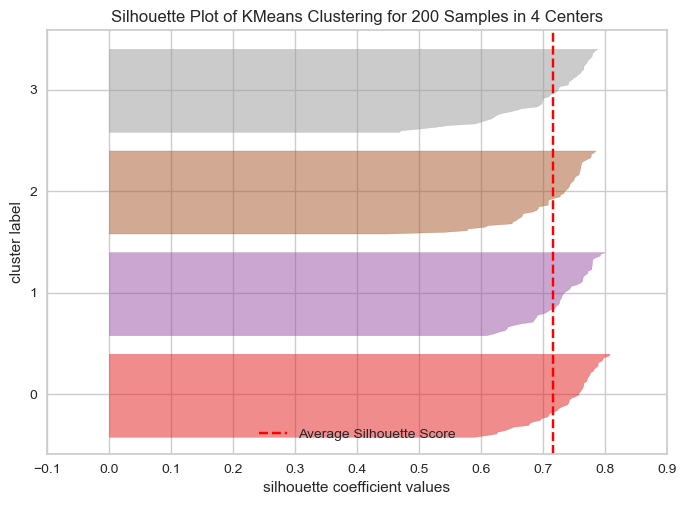

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(df.values)
visualizer.show()

In [11]:
df_preds = df.copy()
df_preds["cluster"] = kmeans.labels_

px.scatter_3d(
    df_preds, 
    x="feature1", y="feature2", z="feature3", 
    height=500, width=600, color="cluster",
    title=f"{k_clusters} Clusters | Silhouette Average: {silhouette_avg}"
)